## Example for AllenDigger usage
This example shows the application of visualization and 3 analysis modules of AllenDigger.

### Data Visualization
#### 1. brain structure

In [1]:
from allendigger import plot

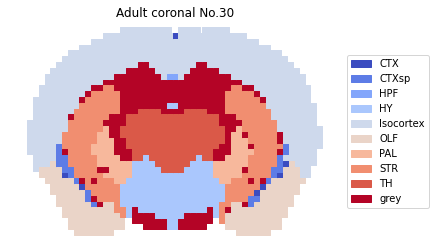

In [2]:
plot.plot2D_anno(time='Adult', section='coronal', section_id=30,anno_level='level_4')

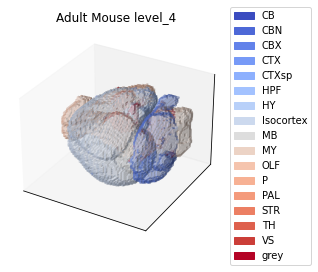

In [3]:
plot.plot3D_anno(time='Adult',anno_level='level_4')

#### 2. gene expression with brain structure annotation

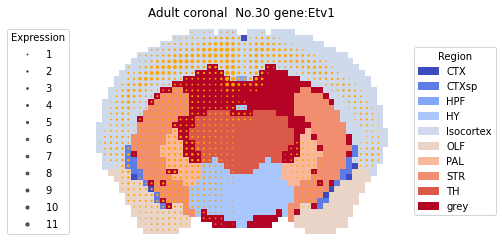

In [4]:
plot.plot2D_expression(gene_name='Etv1',time='Adult',section='coronal',section_id=30,anno_level='level_4')

/Users/zhuoliangchen/opt/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


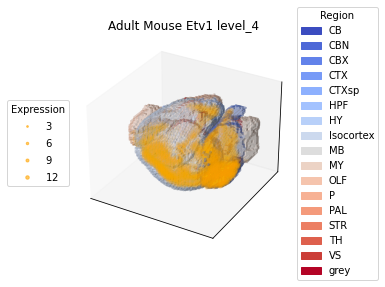

In [5]:
plot.plot3D_expression(gene_name='Etv1',time='Adult',anno_level='level_4')

#### 3. a subset of brain structure and their gene expression

In [2]:
from allendigger import accessdata

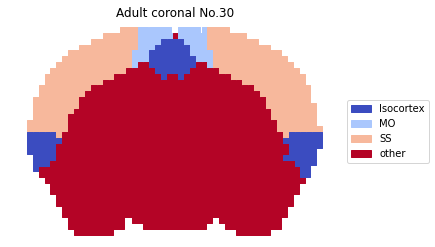

In [7]:
adata = accessdata.get_data(time='Adult')
data = adata[adata.obs['level_4'] == 'Isocortex']
labels = list(set(data.obs['level_6'].tolist()))
plot.plot2D_anno(time='Adult', section='coronal', section_id=30,anno_level='level_6',label=labels)

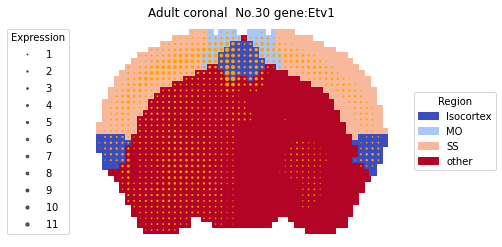

In [8]:
plot.plot2D_expression(gene_name='Etv1',time='Adult', section='coronal', section_id=30,anno_level='level_6',label=labels)

### Spatial domain decoding

In [3]:
from allendigger import analysis

Extracting data for section coronal section_id 14 from stage Adult

Building spatial Network

Spatial Network construction completed

Building GAE model

Training GAE model



/Users/zhuoliangchen/opt/anaconda3/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


Epoch:2,Loss:8.0436
Epoch:3,Loss:5.4575
Epoch:4,Loss:3.6676
Epoch:5,Loss:2.5059
Epoch:6,Loss:1.8502
Epoch:7,Loss:1.5562
Epoch:8,Loss:1.4429
Epoch:9,Loss:1.4006
Epoch:10,Loss:1.4080
Epoch:11,Loss:1.4131
Epoch:12,Loss:1.4161
Epoch:13,Loss:1.4112
Epoch:14,Loss:1.4030
Epoch:15,Loss:1.3895
Epoch:16,Loss:1.3747
Epoch:17,Loss:1.3666
Epoch:18,Loss:1.3593
Epoch:19,Loss:1.3511
Epoch:20,Loss:1.3421
Epoch:21,Loss:1.3390
Epoch:22,Loss:1.3309
Epoch:23,Loss:1.3243
Epoch:24,Loss:1.3177
Epoch:25,Loss:1.3108
Epoch:26,Loss:1.3055
Epoch:27,Loss:1.3029
Epoch:28,Loss:1.2964
Epoch:29,Loss:1.2971
Epoch:30,Loss:1.2909
Epoch:31,Loss:1.2881
Epoch:32,Loss:1.2781
Epoch:33,Loss:1.2841
Epoch:34,Loss:1.2734
Epoch:35,Loss:1.2713
Epoch:36,Loss:1.2665
Epoch:37,Loss:1.2584
Epoch:38,Loss:1.2596
Epoch:39,Loss:1.2502
Epoch:40,Loss:1.2516
Epoch:41,Loss:1.2390
Epoch:42,Loss:1.2379
Epoch:43,Loss:1.2264
Epoch:44,Loss:1.2260
Epoch:45,Loss:1.2110
Epoch:46,Loss:1.2204
Epoch:47,Loss:1.2044
Epoch:48,Loss:1.2054
Epoch:49,Loss:1.1923


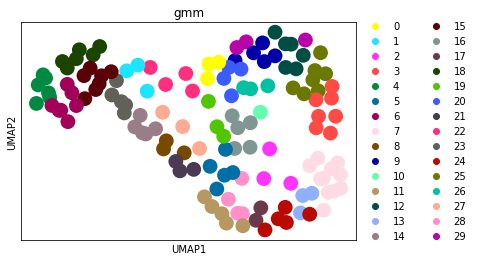

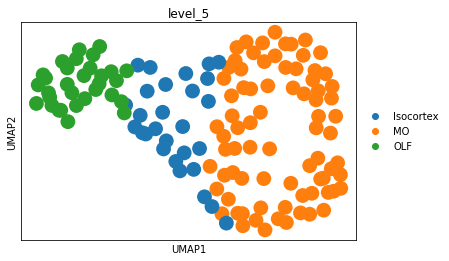

In [10]:
adata = analysis.get_spatial_domain('coronal',14,'Adult',n_components=30,lr_rate=1e-4,weight_decay=1e-5,plot_cluster_result=True,plot_spatial_struct=True,annot_level='level_5',verbose=True)

### Differential expression gene identification

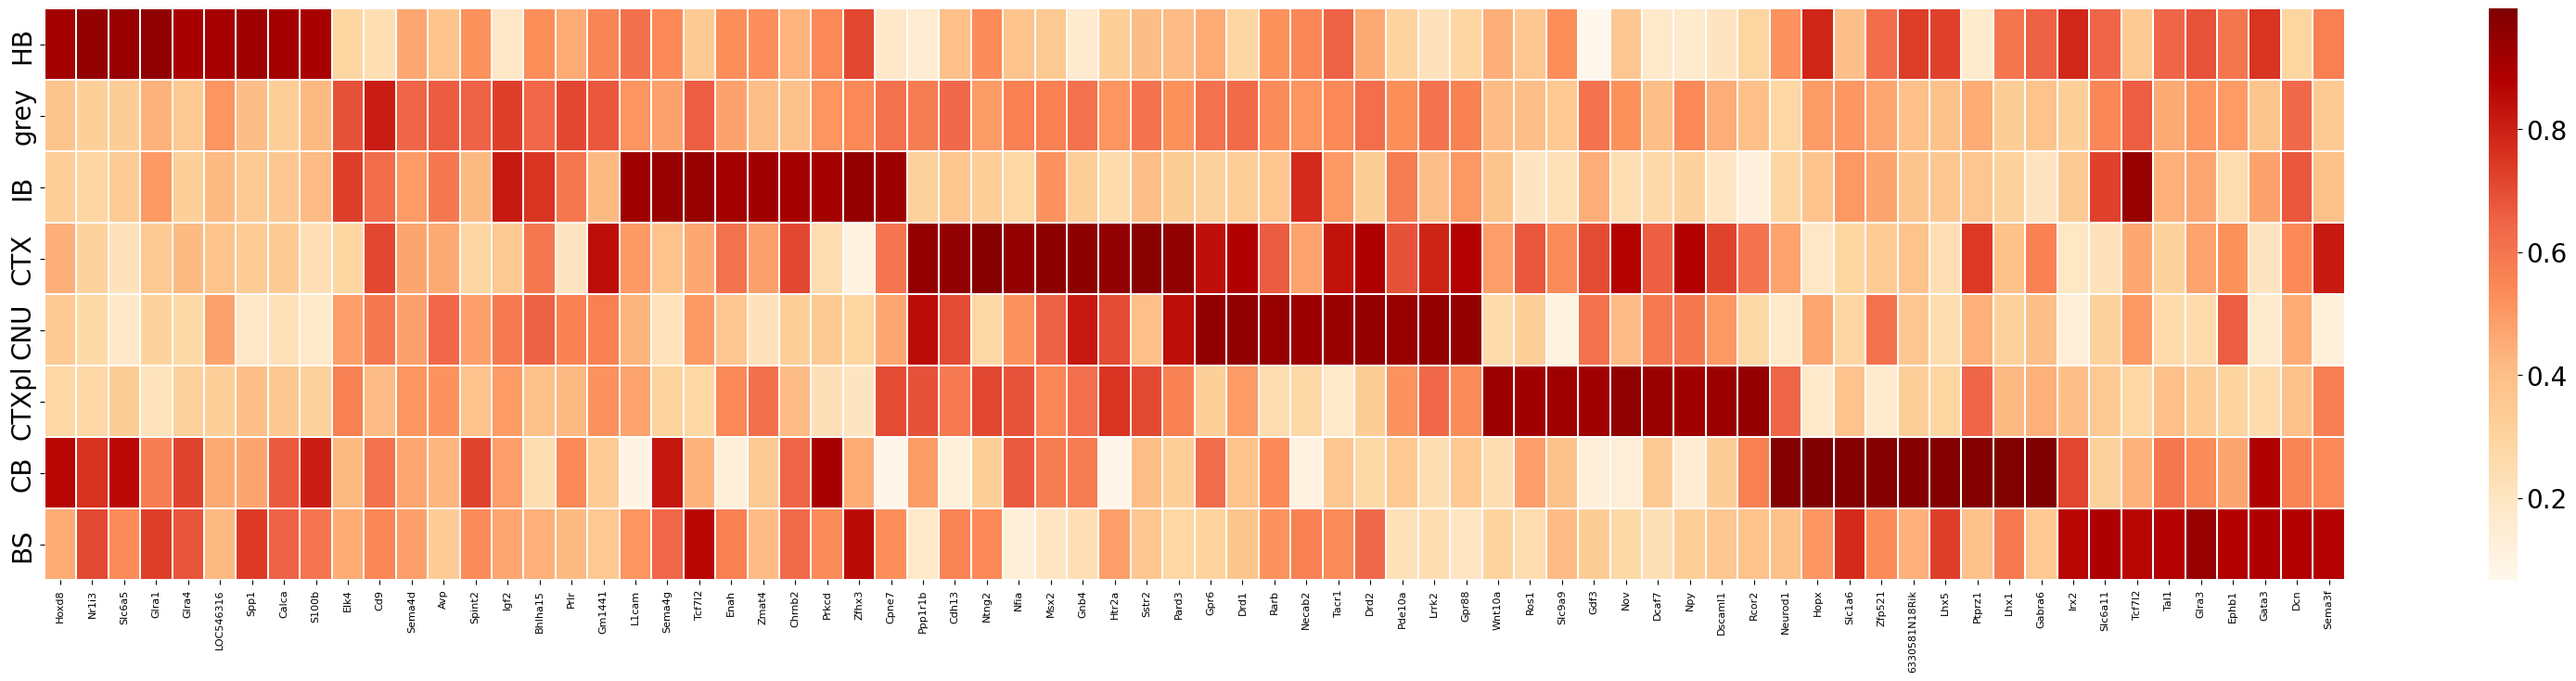

In [13]:
time = 'Adult'
section = 'sagittal'
section_id = 20
anno_level = 'level_3'
n = 10
# get the structure set of brain section of the annotation level 6
d = accessdata.get_section_structure(time=time, section=section, section_id=section_id, anno_level=anno_level)
labels = d.keys()

result = analysis.section_find_differential_expression_marker(time=time, section=section, section_id=section_id, labels=labels, anno_level=anno_level,n=n)

### Cell registration
take HIP subregions as example

In [4]:
import anndata as ad
adata_spatial = ad.read_h5ad('./allendigger/data/allen_hip.h5ad')
adata_scrna = ad.read_h5ad('./allendigger/data/Div-seq_hip_adata.h5ad')

In [6]:
adata_spatial.obs['level_8']

1839     CA1
1872     CA1
1873     CA1
1874     CA1
1875     CA1
        ... 
60708    CA1
60709    CA1
60736    CA1
60737    CA1
60768    CA1
Name: level_8, Length: 2812, dtype: category
Categories (6, object): ['CA1', 'CA2', 'CA3', 'DG', 'FC', 'IG']

In [7]:
adata_scrna.obs['CLUSTER']

A1-P1-DG_S100_L001_R1_001     DG
A1-P1-DG_S101_L001_R1_001     DG
A1-P1-DG_S103_L001_R1_001     DG
A1-P1-DG_S104_L001_R1_001     DG
A1-P1-DG_S105_L001_R1_001    CA1
                            ... 
NH2_1_F9_F09.unmapped.1      CA2
NH2_1_G10_G10.unmapped.1     CA2
NH2_1_G11_G11.unmapped.1     CA2
NH2_1_G2_G02.unmapped.1      CA2
NH2_1_G7_G07.unmapped.1      CA2
Name: CLUSTER, Length: 952, dtype: category
Categories (4, object): ['CA1', 'CA2', 'CA3', 'DG']

In [6]:
adata_spatial = adata_spatial[adata_spatial.obs['level_8'] != 'FC']
adata_spatial = adata_spatial[adata_spatial.obs['level_8'] != 'IG']

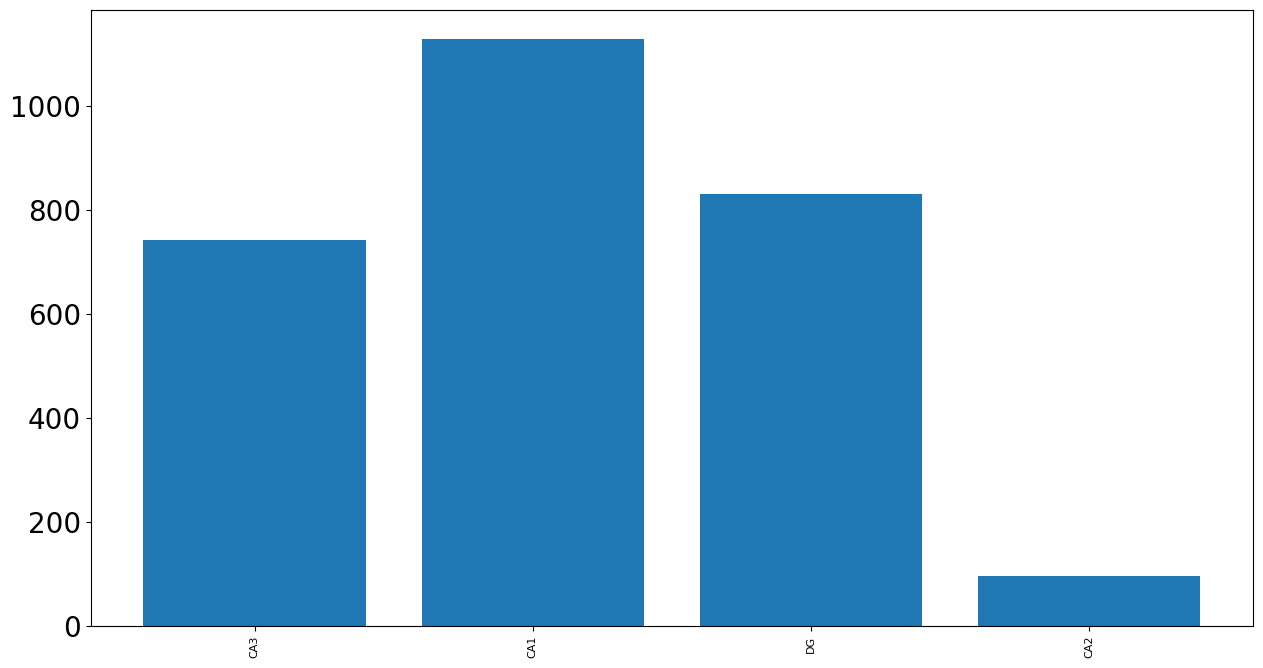

In [9]:
plot.plot_voxel_distribution(adata_spatial,anno_level='level_8')

The imbanlanced distribution among structures of training data will make low performance of prediction. So we need to subset the training data.

In [16]:
import random
random.seed(4)
adata_spatial_ca1 = adata_spatial[adata_spatial.obs['level_8'] == 'CA1']
adata_spatial_ca3 = adata_spatial[adata_spatial.obs['level_8'] == 'CA3']
adata_spatial_dg = adata_spatial[adata_spatial.obs['level_8'] == 'DG']
adata_spatial_ca2 = adata_spatial[adata_spatial.obs['level_8'] == 'CA2']
ca1_index = random.sample(adata_spatial_ca1.obs.index.tolist(),100)
ca3_index = random.sample(adata_spatial_ca3.obs.index.tolist(),100)
dg_index = random.sample(adata_spatial_dg.obs.index.tolist(),100)
ca2_index = adata_spatial_ca2.obs.index.tolist()

adata_spatial_subset = adata_spatial[ca1_index+ca2_index+ca3_index+dg_index,:]

In [38]:
# select feature
gene_list = analysis.select_feature(adata_spatial_subset,anno_level='level_8',n=53)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
Accuracy: 0.8235294117647058
Macro-averaged Precision score : 0.687804005707418
Macro-averaged recall score : 0.7825910706367466
Macro-averaged f1 score : 0.6924216085080108


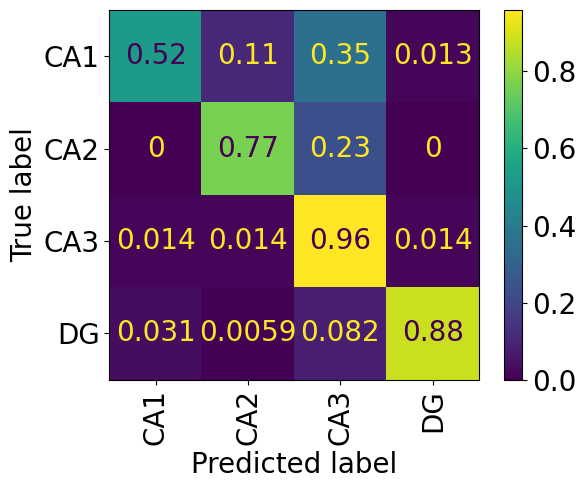

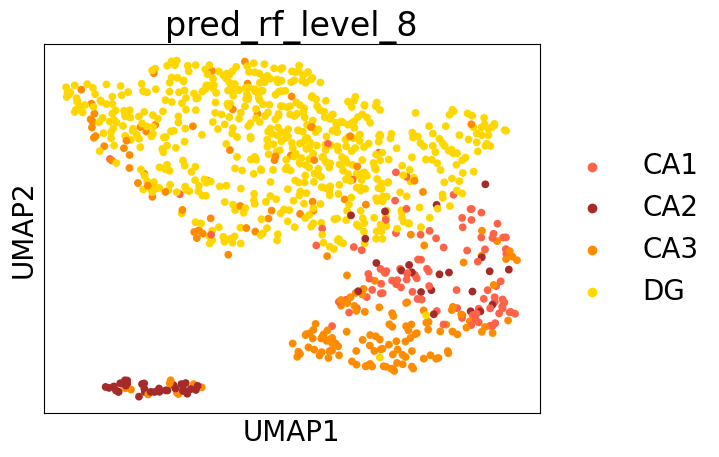

In [39]:
# cell registration
clf,adata_scrna = analysis.structure_mapping(adata_spatial=adata_spatial_subset,time='Adult',anno_level='level_8',
                                            scrna=adata_scrna,gene_use=gene_list,evaluate=True,true_label='CLUSTER',plot_predict_result=True)